In [1]:
import numpy as np
import pandas as pd

# visualization Library/tools
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# machine learning algorith
from sklearn.linear_model import LogisticRegression
from sklearn import svm 
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis



from scipy.stats import randint as sp_randint

In [2]:
#import the dataset
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.shape

(400000, 19)

In [3]:
train.head(5)

user_id       REGION        TENURE  \
0  dcf68cc2fb515ccad7d8b9b3bd80ee2a4b270063  SAINT-LOUIS  K > 24 month   
1  71c44b5ba328db5c4192a80f7cf8f244d9350ed0          NaN  K > 24 month   
2  ce46411b1526c94f20a383b8cb188f8d27f82a0a  TAMBACOUNDA  K > 24 month   
3  f467cdb6669818373c26c2bad44e01ba66f97d21       FATICK  K > 24 month   
4  ec45e1a1888a32b5dcce0954cfec20c6e037db31       FATICK  K > 24 month   

   MONTANT  FREQUENCE_RECH  REVENUE  ARPU_SEGMENT  FREQUENCE  DATA_VOLUME  \
0  17000.0            32.0  18000.0        6000.0       34.0          NaN   
1   4300.0            29.0   4427.0        1476.0       37.0       1764.0   
2   1500.0             3.0   1500.0         500.0        3.0          NaN   
3   1500.0             3.0   2497.0         832.0        4.0          0.0   
4      NaN             NaN    498.0         166.0        3.0          1.0   

   ON_NET  ORANGE  TIGO  ZONE1  ZONE2 MRG  REGULARITY  \
0    97.0   355.0   6.0    NaN    NaN  NO          62   
1     8.0     3.0   0.0    NaN    2.0  NO          40   
2    30.0    30.0   NaN    NaN    NaN  NO          32   
3   159.0    45.0  19.0    NaN    NaN  NO          18   
4     1.0     3.0   NaN    NaN    NaN  NO          50   

                         TOP_PACK  FREQ_TOP_PACK  CHURN  
0           All-net 500F=2000F;5d           35.0      0  
1            Data: 100 F=40MB,24H           22.0      0  
2           All-net 500F=2000F;5d            3.0      0  
3  On net 200F=Unlimited _call24H            3.0      0  
4                             NaN            NaN      0

In [4]:
train['REGION'].unique

<bound method Series.unique of 0         SAINT-LOUIS
1                 NaN
2         TAMBACOUNDA
3              FATICK
4              FATICK
             ...     
399995    TAMBACOUNDA
399996            NaN
399997            NaN
399998            NaN
399999            NaN
Name: REGION, Length: 400000, dtype: object>

In [5]:
test.head(5)

user_id REGION        TENURE  MONTANT  \
0  af900d87e73b7ff6509d2203df4704a98aa5f2a6    NaN  K > 24 month      NaN   
1  5335efd940280b82143272275637d1e65d37eadb    NaN  K > 24 month      NaN   
2  a581f4fa08677c26f83f643248c667e241043086    NaN  K > 24 month   1900.0   
3  64f67177d0775262b8087a9e2e3b8061b6324ae6  DAKAR  K > 24 month   3000.0   
4  0d6009a4594c4be22449b8d9cc01a0bcea98faea  DAKAR  K > 24 month  32000.0   

   FREQUENCE_RECH  REVENUE  ARPU_SEGMENT  FREQUENCE  DATA_VOLUME  ON_NET  \
0             NaN      NaN           NaN        NaN          NaN     NaN   
1             NaN     10.0           3.0        1.0          NaN     NaN   
2            15.0   2299.0         766.0       21.0        414.0     NaN   
3             9.0   2603.0         868.0       14.0        332.0     0.0   
4            47.0  33000.0       11000.0       47.0          NaN   128.0   

   ORANGE   TIGO  ZONE1  ZONE2 MRG  REGULARITY               TOP_PACK  \
0     NaN    NaN    NaN    NaN  NO           1                    NaN   
1     NaN    NaN    NaN    NaN  NO           2                    NaN   
2     7.0    2.0    NaN    NaN  NO          27   Data: 100 F=40MB,24H   
3    23.0    4.0    NaN    NaN  NO          46    IVR Echat_Daily_50F   
4   555.0  280.0    NaN    NaN  NO          61  All-net 500F=2000F;5d   

   FREQ_TOP_PACK  
0            NaN  
1            NaN  
2           17.0  
3            3.0  
4           65.0

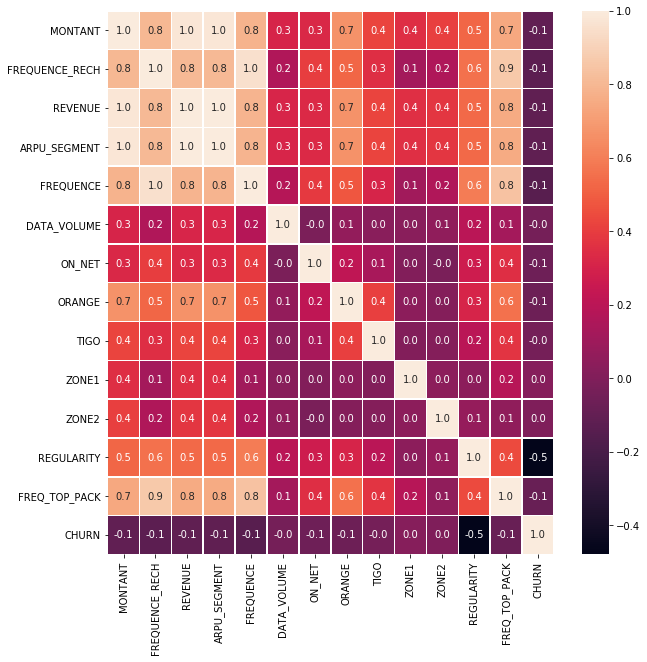

In [6]:
train.corr
#correlation map
import seaborn as sns
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(train.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

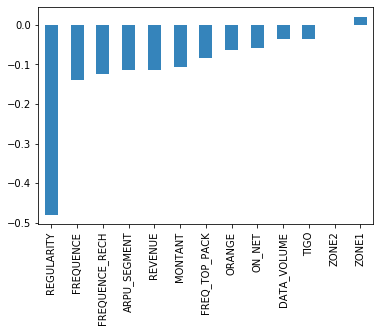

In [7]:
tst = train.corr()['CHURN'].copy()
tst = tst.drop('CHURN')
tst.sort_values(inplace=True)
tst.plot(kind='bar', alpha = 0.9)

In [8]:
train.describe()

MONTANT  FREQUENCE_RECH        REVENUE   ARPU_SEGMENT  \
count  259723.000000   259723.000000  265337.000000  265337.000000   
mean     5522.971346       11.503733    5505.487757    1835.167658   
std      7099.640630       13.275514    7175.802367    2391.929290   
min        20.000000        1.000000       1.000000       0.000000   
25%      1000.000000        2.000000    1000.000000     333.000000   
50%      3000.000000        6.000000    3000.000000    1000.000000   
75%      7300.000000       15.000000    7340.000000    2447.000000   
max    226550.000000      133.000000  233413.000000   77804.000000   

           FREQUENCE    DATA_VOLUME         ON_NET         ORANGE  \
count  265337.000000  203146.000000  254181.000000  233683.000000   
mean       13.951835    3369.763441     275.917586      95.532927   
std        14.679943   12281.867504     873.593034     204.733272   
min         1.000000       0.000000       0.000000       0.000000   
25%         3.000000       0.000000       5.000000       7.000000   
50%         9.000000     267.000000      27.000000      29.000000   
75%        19.000000    2925.000000     155.000000      99.000000   
max        91.000000  934576.000000   45011.000000    6788.000000   

                TIGO         ZONE1         ZONE2     REGULARITY  \
count  160614.000000  31690.000000  25513.000000  400000.000000   
mean       23.134608      7.874282      7.187003      28.046502   
std        63.061871     35.642843     26.964028      22.282773   
min         0.000000      0.000000      0.000000       1.000000   
25%         2.000000      0.000000      0.000000       6.000000   
50%         6.000000      1.000000      2.000000      24.000000   
75%        20.000000      3.000000      5.000000      51.000000   
max      2758.000000   1657.000000   1011.000000      62.000000   

       FREQ_TOP_PACK         CHURN  
count  232671.000000  400000.00000  
mean        9.254209       0.18711  
std        12.305563       0.39000  
min         1.000000       0.00000  
25%         2.000000       0.00000  
50%         5.000000       0.00000  
75%        12.000000       0.00000  
max       629.000000       1.00000

In [9]:
#Making a copy of the training and test data
df_test= test.copy() 
df_train= train.copy()

In [10]:
df_train.set_index('user_id', inplace = True)
df_test.set_index('user_id',inplace=True)

In [11]:
df_train.isna().sum()

REGION            157520
TENURE                 0
MONTANT           140277
FREQUENCE_RECH    140277
REVENUE           134663
ARPU_SEGMENT      134663
FREQUENCE         134663
DATA_VOLUME       196854
ON_NET            145819
ORANGE            166317
TIGO              239386
ZONE1             368310
ZONE2             374487
MRG                    0
REGULARITY             0
TOP_PACK          167329
FREQ_TOP_PACK     167329
CHURN                  0
dtype: int64

In [12]:
#check percentage of null values
((df_train.isna().sum()*100)/len(df_train)).sort_values(ascending=False)


ZONE2             93.62175
ZONE1             92.07750
TIGO              59.84650
DATA_VOLUME       49.21350
TOP_PACK          41.83225
FREQ_TOP_PACK     41.83225
ORANGE            41.57925
REGION            39.38000
ON_NET            36.45475
FREQUENCE_RECH    35.06925
MONTANT           35.06925
FREQUENCE         33.66575
ARPU_SEGMENT      33.66575
REVENUE           33.66575
MRG                0.00000
REGULARITY         0.00000
TENURE             0.00000
CHURN              0.00000
dtype: float64

In [13]:
#no of unique values
df_train.nunique()

REGION               14
TENURE                8
MONTANT            2421
FREQUENCE_RECH      111
REVENUE           23760
ARPU_SEGMENT      11014
FREQUENCE            91
DATA_VOLUME       22229
ON_NET             5996
ORANGE             2072
TIGO                805
ZONE1               319
ZONE2               255
MRG                   1
REGULARITY           62
TOP_PACK            111
FREQ_TOP_PACK       170
CHURN                 2
dtype: int64

In [14]:
#drop MRG because it contains a single Unique value
#drop ZONE1 and ZONE2 because it contains too much missing values
df_train.drop(['ZONE1','ZONE2','MRG'], axis =1, inplace = True)
df_test.drop(['ZONE1','ZONE2','MRG'], axis =1, inplace = True)

In [15]:
### Missing Value Treatmen

In [16]:
df_test['CHURN'] = 'test' # for easy seperation

#Combine train and test  to avoid repetition
data = pd.concat([df_train, df_test]).reset_index(drop=True)

In [17]:
data.shape ,df_train.shape, df_test.shape

((500000, 15), (400000, 15), (100000, 15))

In [18]:
missing_col = data.columns[data.isna().any()]
missing_col

Index(['REGION', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT',
       'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'TOP_PACK',
       'FREQ_TOP_PACK'],
      dtype='object')

In [19]:
data['REGION'].head()

0    SAINT-LOUIS
1            NaN
2    TAMBACOUNDA
3         FATICK
4         FATICK
Name: REGION, dtype: object

In [20]:
# filling NaN values in numeric features
for col in missing_col.drop(['REGION', 'TOP_PACK']):
    
    data[col].fillna(data[col].median(), inplace = True)
data['REGION'].head(10)

0    SAINT-LOUIS
1            NaN
2    TAMBACOUNDA
3         FATICK
4         FATICK
5          THIES
6            NaN
7    SAINT-LOUIS
8    TAMBACOUNDA
9            NaN
Name: REGION, dtype: object

In [21]:
# filling NaN values in numeric features
for col in [ 'TOP_PACK', 'REGION']:
    
    data[col].fillna(col+'_NAN',inplace = True)
data['REGION'].head(10)

0    SAINT-LOUIS
1     REGION_NAN
2    TAMBACOUNDA
3         FATICK
4         FATICK
5          THIES
6     REGION_NAN
7    SAINT-LOUIS
8    TAMBACOUNDA
9     REGION_NAN
Name: REGION, dtype: object

In [22]:
data.isna().sum()

REGION            0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
REGULARITY        0
TOP_PACK          0
FREQ_TOP_PACK     0
CHURN             0
dtype: int64

In [23]:
#Encoding Categorical features
cat_features = data.select_dtypes(exclude=np.number).columns.drop('CHURN','user_id')
cat_features

Index(['REGION', 'TENURE', 'TOP_PACK'], dtype='object')

In [24]:
for col in cat_features:
    print('{} has {} unique categories'.format(col, data[col].nunique()))

REGION has 15 unique categories
TENURE has 8 unique categories
TOP_PACK has 113 unique categories


In [25]:

data = pd.get_dummies(columns= ['REGION', 'TENURE'], data = data)

In [26]:
#Label encoding
data['TOP_PACK']  = pd.factorize(data['TOP_PACK'])[0]

In [27]:
data.columns

Index(['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE',
       'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'REGULARITY', 'TOP_PACK',
       'FREQ_TOP_PACK', 'CHURN', 'REGION_DAKAR', 'REGION_DIOURBEL',
       'REGION_FATICK', 'REGION_KAFFRINE', 'REGION_KAOLACK', 'REGION_KEDOUGOU',
       'REGION_KOLDA', 'REGION_LOUGA', 'REGION_MATAM', 'REGION_REGION_NAN',
       'REGION_SAINT-LOUIS', 'REGION_SEDHIOU', 'REGION_TAMBACOUNDA',
       'REGION_THIES', 'REGION_ZIGUINCHOR', 'TENURE_D 3-6 month',
       'TENURE_E 6-9 month', 'TENURE_F 9-12 month', 'TENURE_G 12-15 month',
       'TENURE_H 15-18 month', 'TENURE_I 18-21 month', 'TENURE_J 21-24 month',
       'TENURE_K > 24 month'],
      dtype='object')

In [28]:
data.drop(['TENURE_D 3-6 month','REGION_DAKAR'], 1, inplace=True)

In [46]:
data.head()

MONTANT  FREQUENCE_RECH  REVENUE  ARPU_SEGMENT  FREQUENCE  DATA_VOLUME  \
0  17000.0            32.0  18000.0        6000.0       34.0        267.0   
1   4300.0            29.0   4427.0        1476.0       37.0       1764.0   
2   1500.0             3.0   1500.0         500.0        3.0        267.0   
3   1500.0             3.0   2497.0         832.0        4.0          0.0   
4   3000.0             7.0    498.0         166.0        3.0          1.0   

   ON_NET  ORANGE  TIGO  REGULARITY  ...  REGION_TAMBACOUNDA  REGION_THIES  \
0    97.0   355.0   6.0          62  ...                   0             0   
1     8.0     3.0   0.0          40  ...                   0             0   
2    30.0    30.0   6.0          32  ...                   1             0   
3   159.0    45.0  19.0          18  ...                   0             0   
4     1.0     3.0   6.0          50  ...                   0             0   

  REGION_ZIGUINCHOR  TENURE_E 6-9 month  TENURE_F 9-12 month  \
0                 0                   0                    0   
1                 0                   0                    0   
2                 0                   0                    0   
3                 0                   0                    0   
4                 0                   0                    0   

   TENURE_G 12-15 month  TENURE_H 15-18 month  TENURE_I 18-21 month  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   TENURE_J 21-24 month  TENURE_K > 24 month  
0                     0                    1  
1                     0                    1  
2                     0                    1  
3                     0                    1  
4                     0                    1  

[5 rows x 34 columns]

## Seperating train and test

In [29]:
train_df = data.loc[( data['CHURN'] != 'test')].reset_index(drop = True)
test_df = data.loc[( data['CHURN'] == 'test')].reset_index(drop = True)

In [30]:
train_df.columns

Index(['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE',
       'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'REGULARITY', 'TOP_PACK',
       'FREQ_TOP_PACK', 'CHURN', 'REGION_DIOURBEL', 'REGION_FATICK',
       'REGION_KAFFRINE', 'REGION_KAOLACK', 'REGION_KEDOUGOU', 'REGION_KOLDA',
       'REGION_LOUGA', 'REGION_MATAM', 'REGION_REGION_NAN',
       'REGION_SAINT-LOUIS', 'REGION_SEDHIOU', 'REGION_TAMBACOUNDA',
       'REGION_THIES', 'REGION_ZIGUINCHOR', 'TENURE_E 6-9 month',
       'TENURE_F 9-12 month', 'TENURE_G 12-15 month', 'TENURE_H 15-18 month',
       'TENURE_I 18-21 month', 'TENURE_J 21-24 month', 'TENURE_K > 24 month'],
      dtype='object')

In [31]:
test_df.columns

Index(['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE',
       'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'REGULARITY', 'TOP_PACK',
       'FREQ_TOP_PACK', 'CHURN', 'REGION_DIOURBEL', 'REGION_FATICK',
       'REGION_KAFFRINE', 'REGION_KAOLACK', 'REGION_KEDOUGOU', 'REGION_KOLDA',
       'REGION_LOUGA', 'REGION_MATAM', 'REGION_REGION_NAN',
       'REGION_SAINT-LOUIS', 'REGION_SEDHIOU', 'REGION_TAMBACOUNDA',
       'REGION_THIES', 'REGION_ZIGUINCHOR', 'TENURE_E 6-9 month',
       'TENURE_F 9-12 month', 'TENURE_G 12-15 month', 'TENURE_H 15-18 month',
       'TENURE_I 18-21 month', 'TENURE_J 21-24 month', 'TENURE_K > 24 month'],
      dtype='object')

In [32]:
train_df.shape, test_df.shape

((400000, 34), (100000, 34))

In [33]:
X = train_df.drop('CHURN', axis = 1)
y = train_df['CHURN'].apply(int)
y

0         0
1         0
2         0
3         0
4         0
         ..
399995    0
399996    0
399997    0
399998    1
399999    0
Name: CHURN, Length: 400000, dtype: int64

In [34]:
# Modelling

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier



In [36]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.80, random_state = 1234)

#Observing the dimension
X_train.shape, y_train.shape, X_test.shape, y_test.shape



((80000, 33), (80000,), (320000, 33), (320000,))

In [37]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [38]:
gbm = GradientBoostingClassifier()

xgb = XGBClassifier()

In [39]:

gbm.fit(X_train, y_train)

xgb.fit( X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [40]:
print('GradientBoostingClassifier Log loss: {}'.format(log_loss(y_test, gbm.predict_proba(X_test))))
print('XGB Log loss: {}'.format(log_loss(y_test, xgb.predict_proba(X_test))))

GradientBoostingClassifier Log loss: 0.2551257143736147
XGB Log loss: 0.2588921790123762


In [49]:
lgb = LGBMClassifier()
cb = CatBoostClassifier()

cb.fit( X_train, y_train)
lgb.fit(X_train, y_train)

AttributeError: 'DataFrame' object has no attribute 'dytpes'

In [42]:
print('LightGradientBoostingClassifier Log loss: {}'.format(log_loss(y_test, lgb.predict_proba(X_test)[:,1])))
print('CB Log loss: {}'.format(log_loss(y_test, cb.predict_proba(X_test))))

LightGradientBoostingClassifier Log loss: 0.25521935821180214
CB Log loss: 0.2565782143587493


In [43]:


test_pred = lgb.predict(test_df.drop('CHURN', axis = 1) )    #predict on the test set for submission
df = {'user_id': test['user_id'], 'CHURN': test_pred}
sub = pd.DataFrame(data = df)
sub = sub[['user_id', 'CHURN']]
sub.to_csv('sampleSubmissionlgb.csv', index = False)

In [44]:
test_pred = cb.predict(test_df.drop('CHURN', axis = 1) )    #predict on the test set for submission
df = {'user_id': test['user_id'], 'CHURN': test_pred}
sub = pd.DataFrame(data = df)
sub = sub[['user_id', 'CHURN']]
sub.to_csv('sampleSubmissioncb.csv', index = False)

In [45]:
test_pred = gbm.predict(test_df.drop('CHURN', axis = 1) )    #predict on the test set for submission
df = {'user_id': test['user_id'], 'CHURN': test_pred}
sub = pd.DataFrame(data = df)
sub = sub[['user_id', 'CHURN']]
sub.to_csv('sampleSubmissiongbm.csv', index = False)